# TensorFlow Basics

## Topics Covered :

1. Constants in tensorflow
2. Maths function in tensorflow
3. Sessions in tensorflow
4. Rank, shape and datatype of tensor
5. Placeholders in tensorflow
6. Variables in tensorflow
7. Images as tensor
8. Building TF model for digit prediction

In [10]:
# importing tensorflow
import tensorflow as tf

In [13]:
# defining constants
x = tf.constant(5)
y = tf.constant(6)

In [14]:
# multiplying both x and y
result = tf.multiply(x, y)

In [15]:
# creating session of tf
tf_sess = tf.Session()
print(tf_sess.run(result))
# printing the multiplication value

30


In [16]:
# closing session
tf_sess.close()

In [17]:
# other way to do this
with tf.Session() as sess:
    output = sess.run(result)
    print(output)
# printing the multiplication value
# session will automatically close

30


In [18]:
# accessing sess after closing it
print(sess.run(result))
# got runtime error as "attempted to use a closed Session"

RuntimeError: Attempted to use a closed Session.

In [19]:
# accessing output as python variable
print(output)

30


In [20]:
# creating more constants
# two param used 1st for value and 2nd for name which we use in tensorboard visual
# a, b, c, d are n-multidimensional array or tensors or edges in computational graph
a = tf.constant(6, name = 'constant_a')
b = tf.constant(3, name = 'constant_b')
c = tf.constant(4, name = 'constant_c')
d = tf.constant(2, name = 'constant_d')

In [21]:
# performing multiply operation of a with b
# mul is operation or node or operator which process on tensor
mul = tf.multiply(a, b, name= 'mul_of_a_by_b')

In [22]:
# printing mul
print(mul)

# outputting name, shape and datatype(int32) of tensor

Tensor("mul_of_a_by_b:0", shape=(), dtype=int32)


In [23]:
# performing division operation of c by d
div = tf.divide(c, d, name = 'div_of_c_by_d')

In [24]:
# printing div
print(div)

# outputting name, shape and datatype(float64) of tensor

Tensor("div_of_c_by_d:0", shape=(), dtype=float64)


In [25]:
# adding input from both the node
# casting div to int32
add = tf.add_n([mul, tf.cast(div, dtype='int32')], name = 'add_of_mul_and_div')

In [26]:
# printing add
print(add)

# outputting name, shape and datatype(int32) of tensor
# _8 is number of times it is created or executed
# all these operation has constructed computational graph
# these graphs specifies operations(node) and data(edges)

Tensor("add_of_mul_and_div:0", shape=(), dtype=int32)


In [27]:
# creating tensorflow session object
# sessions supervise the execution of tensorflow graphs
sess = tf.Session()
print(sess)

In [28]:
# running session for mul intermediate node
print('Multiplication is :', sess.run(mul))

Multiplication is : 18


In [29]:
# running session for div intermediate node
print('Division is :', sess.run(div))

Division is : 2.0


In [30]:
# running the session to execute the graph
print('Addition is :', sess.run(add))

# 6*3(node) + 4/2(node)=18(flow by edge to other node) + 2(flow by edge to other node)=20

Addition is : 20


In [72]:
# to create graph and store it in log
#writer = tf.summary.FileWriter('file_path', sess.graph())

In [31]:
# closing tensorflow session
sess.close()

In [74]:
import datetime, os

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

# visit this link, http://0.0.0.0:6006/#graphs&run=add_graph for graph visualization

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
# killing pid
!kill 8800
print('Session Killed')

In [32]:
# getting rank of tensor ( dimension)
sess = tf.Session()
zeroD = tf.constant(5)
print('Rank of zeroD :', sess.run(tf.rank(zeroD)))

Rank of zeroD : 0


In [33]:
# for 1D
oneD = tf.constant(['How', 'are', 'you?'])
print('Rank of oneD :', sess.run(tf.rank(oneD)))

Rank of oneD : 1


In [34]:
# for 2D
twoD = tf.constant([[1, 2], [3, 4]])
print('Rank of oneD :', sess.run(tf.rank(twoD)))

Rank of oneD : 2


In [35]:
# for 3D
threeD = tf.constant([[[1, 2], [3, 4]], [[1, 2], [3, 4]]])
print('Rank of oneD :', sess.run(tf.rank(threeD)))

Rank of oneD : 3


In [36]:
# performing math operations in tensor
x = tf.constant([100, 200, 300], name = 'x')
y = tf.constant([1, 2, 3], name = 'y')

In [37]:
# printing x and y
print('x is :', sess.run(x))
print('y is :', sess.run(y))

x is : [100 200 300]
y is : [1 2 3]


In [38]:
# sum of x
print('Sum of x :', sess.run(tf.reduce_sum(x, name = 'sum_x')))

Sum of x : 600


In [39]:
# product of x
print('Product of y :', sess.run(tf.reduce_prod(y, name = 'sum_y')))

Product of y : 6


In [40]:
# importing numpy library
import numpy as np

# creating 0D array in numpy
zeroD = np.array(30, dtype=np.int32)

# numpy as tensorflow
print('Rank is :', sess.run(tf.rank(zeroD)))

Rank is : 0


In [41]:
# getting shape of tensor
print('Shape is :', sess.run(tf.shape(zeroD)))

Shape is : []


In [42]:
# creating 1D array
oneD = np.array([5.2, 4.3, 9.0, 6.4], dtype=np.float32)

# getting rank of tensor
print('Rank is :', sess.run(tf.rank(oneD)))

# getting shape of tensor
print('Shape is :', sess.run(tf.shape(oneD)))

Rank is : 1
Shape is : [4]


In [44]:
# simple math with placeholders in tensorflow
x = tf.placeholder(tf.int32, shape=[3], name='x_placeholder')
y = tf.placeholder(tf.int32, shape=[3], name='y_placeholder')

# applying reduce_sum on x
sum_x = tf.reduce_sum(x, name='sum_x')

# applying reduce_prod on y
prod_y = tf.reduce_prod(y, name='prod_y')

# applying div operation
div = tf.div(sum_x, prod_y, name='div')

# applying mean operation
mean = tf.reduce_mean([sum_x, prod_y], name='mean')

In [45]:
# running sessions and feeding data usinf feed_dict
print('x is :', sess.run(x, feed_dict={x:[100, 200, 300]}))
print('y is :', sess.run(y, feed_dict={y:[1, 2, 3]}))
print('Sum is :', sess.run(sum_x, feed_dict={x:[100, 200, 300]}))
print('Product is :', sess.run(prod_y, feed_dict={y:[1, 2, 3]}))

x is : [100 200 300]
y is : [1 2 3]
Sum is : 600
Product is : 6


In [46]:
# finding div and mean
print('Division is :', sess.run(div, feed_dict={x:[100, 200, 300], y:[1, 2, 3]}))
print('Mean is :', sess.run(mean, feed_dict={x:[1000, 2000, 3000], y:[10, 20, 30]}))

Division is : 100
Mean is : 6000


In [47]:
# closing session
sess.close()

In [48]:
# solving y = Wx + b

# creating constant
W = tf.constant([10, 100], name='const_W')

# creating placeholders
x = tf.placeholder(tf.int32, name='x')
b = tf.placeholder(tf.int32, name='y')

# finding out Wx
Wx = tf.multiply(W, x, name='Wx')

# finding y
y = tf.add(Wx, b, name='y')

In [49]:
# printing value for y
with tf.Session() as sess:
    print('Wx is :', sess.run(Wx, feed_dict={x:[3, 33]}))
    print('y is :', sess.run(fetches=y, feed_dict={x:[5, 50], b:[7, 9]}))
    
    # printing both in one session using fetches
    print('Wx and y is :', sess.run(fetches=[Wx,y], feed_dict={x:[5, 50], b:[7, 9]}))
# fetches holds the nodes you want to compute fetches=[x, y] etc.

Wx is : [  30 3300]
y is : [  57 5009]
Wx and y is : [array([  50, 5000], dtype=int32), array([  57, 5009], dtype=int32)]


In [50]:
# variables in tensorflow to hold constantly changing value
# variables are mutable changes when graph changes
# calculating Wx + b, here W and b are variables whereas x is placeholder
W = tf.Variable([2.5, 4.0], tf.float32, name='W')
x = tf.placeholder(tf.float32, name='x')
b = tf.Variable([5.0, 10.0], tf.float32, name='b')

# computing y
y = W*x + b

In [55]:
# initializing all the defined variables
init = tf.global_variables_initializer()

# for initializing particular variable
# init = tf.variables_initializer([W])

In [54]:
# creating session
with tf.Session() as sess:
    sess.run(init)
    print('y is :', sess.run(fetches=y, feed_dict={x:[5, 50]}))

y is : [ 17.5 210. ]


In [57]:
# practical implementation 
number = tf.Variable(2, tf.float32, name='number')
multiplier = tf.Variable(1, tf.float32, name='multiplier')

# initializing varibales
init = tf.variables_initializer([number, multiplier])

# assigning variable
result = number.assign(tf.multiply(number, multiplier))

# creating session and updating number
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10):
        print('Updated number is :', sess.run(result))
        print('Increment multiplier :', sess.run(multiplier.assign_add(1)))
        print()

Updated number is : 2
Increment multiplier : 2

Updated number is : 4
Increment multiplier : 3

Updated number is : 12
Increment multiplier : 4

Updated number is : 48
Increment multiplier : 5

Updated number is : 240
Increment multiplier : 6

Updated number is : 1440
Increment multiplier : 7

Updated number is : 10080
Increment multiplier : 8

Updated number is : 80640
Increment multiplier : 9

Updated number is : 725760
Increment multiplier : 10

Updated number is : 7257600
Increment multiplier : 11



In [61]:
# creating own graph of computation not using default graph
user_graph = tf.Graph()

# using this as default graph
with user_graph.as_default():
    with tf.Session() as sess:
        # compute y = Ax = b
        A = tf.constant([5,7], tf.int32, name='A')
        x = tf.placeholder(tf.int32, name='x')
        b = tf.constant([3, 4], tf.int32, name='b')
        # computing
        y = A * x + b
        # running session
        print('y is :', sess.run(y, feed_dict={x:[10, 100]}))
        # asserting graph of y as user created graph
        assert y.graph is user_graph

y is : [ 53 704]


In [63]:
# named_scope for better debugging of node in tensorboard
# logical block which contains process like equation etc
# Equation_1 = Ax^2 + Bx + C
# Equation_2 = Ax^2 + Bx^2

# defining constants
A = tf.constant([4], tf.int32, name='A')
B = tf.constant([5], tf.int32, name='B')
C = tf.constant([6], tf.int32, name='C')

# defining placeholder
x = tf.placeholder(tf.int32, name='x')

# Equation_1 = Ax^2 + Bx + C using name_scope
with tf.name_scope('Equation_1'):
    Ax2 = tf.multiply(A, tf.pow(x, 2), name='Ax2')
    Bx = tf.multiply(B, x, name='Bx')
    y1 = tf.add_n([Ax2, Bx, C], name='y1')
    
# Equation_2 = Ax^2 + Bx^2 using name_scope
with tf.name_scope('Equation_2'):
    Ax2 = tf.multiply(A, pow(x, 2), name='Ax2')
    Bx2 = tf.multiply(B, pow(x, 2), name='Bx2')
    y2 = tf.add_n([Ax2, Bx2], name='y2')
    
# Adding both equation
with tf.name_scope('Final_sum'):
    y = y1 + y2

In [64]:
# creating session 
with tf.Session() as sess:
    print('y is :', sess.run(y, feed_dict={x:[10]}))

y is : [1356]


In [79]:
# create a writer session for saving graph

In [85]:
# creating interactive session
tf.InteractiveSession()
x = tf.constant(10, tf.int32, name='x')
y = tf.constant(20, tf.int32, name='y')
z = x * y
# using eval() for computation
print(z.eval())

200


In [1]:
# working on images as tensor
# importing matplotlib
import matplotlib.pyplot as plot
import matplotlib.image as mp_imp

In [3]:
# loading image
filename = './dandelion.png'

# reading image
image = mp_imp.imread(filename)

In [5]:
# getting shape of image
print('Image Shape :', image.shape)

Image Shape : (1024, 1024, 4)


In [6]:
# getting array of image
print('Image Array :', image)

Image Array : [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


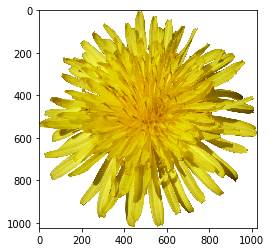

In [8]:
# plotting image
plot.imshow(image)
plot.show()

Shape of Transposed Image : (1024, 1024, 4)


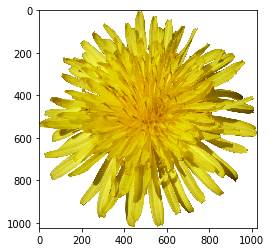

In [12]:
# creating varibale
x = tf.Variable(image, name='x')
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # transpose = tf.transpose(x, perm=[1, 0, 2])
    transpose = tf.image.transpose_image(x)
    result = sess.run(transpose)
    print('Shape of Transposed Image :', image.shape)
    plot.imshow(image)
    plot.show()

In [15]:
# working with list of images and resizing it
import tensorflow as tf
from Pillow import Image

ModuleNotFoundError: No module named 'Pillow'

## Building TF Model (digit recognization)

### Steps :

    1. input > weight > hidden layer1 (activation function)
    2. weights > hidden layer2 (activation function)
    3. weights > output layer
    4. compare output to intended output > cost or loss function (cross entropy)
    5. optimization funtion > minimize cost (AdamOptimizer, SGD, AdaGrad..)
    6. this process is called feed forward neural network
    7. backpropagation > balancing weights
    8. feedforward + backprop = epoch > number of times until convergence

In [38]:
# importing libraries
import tensorflow as tf
import numpy as np

In [39]:
# importing MNIST data set
from tensorflow.examples.tutorials.mnist import input_data

In [40]:
# storing data
mnist = input_data.read_data_sets('mnist_data/', one_hot=True)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [41]:
# getting training digits and training labels from data only 10000 data
training_digits, training_labels = mnist.train.next_batch(50000)

In [42]:
# getting testing digits and testing labels from data only 2000 data
testing_digits, testing_labels = mnist.train.next_batch(2000)

In [43]:
# creating placeholders for train and test digit
training_digits_pl = tf.placeholder('float', [None, 784])
testing_digits_pl = tf.placeholder('float', [784])

In [44]:
# calculating nearest neighbors distance using l1 distance
l1_distance = tf.abs(tf.add(training_digits_pl, tf.negative(testing_digits_pl)))

# reducing the sum by adding all values in l1_distance list
distance = tf.reduce_sum(l1_distance, axis=1)

# getting minimum distnace index from the distance list
pred = tf.math.argmin(distance, 0)
accuracy = 0.

In [45]:
# initializing the variables
inint = tf.global_variables_initializer()

# running session
with tf.Session() as sess:
    sess.run(inint)
    
    # loop over test data
    for i in range(len(testing_digits)):
        # get nearest neighbor index
        nn_index = sess.run(pred,\
                   feed_dict={training_digits_pl:training_digits, testing_digits_pl:testing_digits[i, :]})
        # get nearest neighbor class label and compare it to its true label
        print('Test', i, 'Prediction:', np.argmax(training_labels[nn_index]), \
              'True Label:', np.argmax(testing_labels[i]))
        # calculating accuracy
        if np.argmax(training_labels[nn_index]) == np.argmax(testing_labels[i]):
            accuracy +=1./len(testing_digits)
        
    print('Done!')
    print('Accuracy is :', accuracy)

Test 0 Prediction: 6 True Label: 6
Test 1 Prediction: 6 True Label: 6
Test 2 Prediction: 7 True Label: 7
Test 3 Prediction: 5 True Label: 5
Test 4 Prediction: 8 True Label: 8
Test 5 Prediction: 6 True Label: 8
Test 6 Prediction: 6 True Label: 6
Test 7 Prediction: 1 True Label: 1
Test 8 Prediction: 4 True Label: 4
Test 9 Prediction: 2 True Label: 2
Test 10 Prediction: 9 True Label: 9
Test 11 Prediction: 0 True Label: 0
Test 12 Prediction: 6 True Label: 6
Test 13 Prediction: 6 True Label: 6
Test 14 Prediction: 4 True Label: 4
Test 15 Prediction: 2 True Label: 2
Test 16 Prediction: 8 True Label: 8
Test 17 Prediction: 4 True Label: 4
Test 18 Prediction: 6 True Label: 6
Test 19 Prediction: 4 True Label: 4
Test 20 Prediction: 6 True Label: 6
Test 21 Prediction: 5 True Label: 5
Test 22 Prediction: 5 True Label: 5
Test 23 Prediction: 6 True Label: 6
Test 24 Prediction: 9 True Label: 9
Test 25 Prediction: 9 True Label: 9
Test 26 Prediction: 8 True Label: 8
Test 27 Prediction: 2 True Label: 2
Te

Test 225 Prediction: 9 True Label: 9
Test 226 Prediction: 7 True Label: 7
Test 227 Prediction: 1 True Label: 1
Test 228 Prediction: 3 True Label: 3
Test 229 Prediction: 6 True Label: 6
Test 230 Prediction: 9 True Label: 9
Test 231 Prediction: 4 True Label: 4
Test 232 Prediction: 7 True Label: 7
Test 233 Prediction: 2 True Label: 2
Test 234 Prediction: 1 True Label: 2
Test 235 Prediction: 2 True Label: 2
Test 236 Prediction: 1 True Label: 1
Test 237 Prediction: 3 True Label: 3
Test 238 Prediction: 2 True Label: 2
Test 239 Prediction: 3 True Label: 3
Test 240 Prediction: 8 True Label: 8
Test 241 Prediction: 2 True Label: 2
Test 242 Prediction: 4 True Label: 4
Test 243 Prediction: 8 True Label: 8
Test 244 Prediction: 0 True Label: 0
Test 245 Prediction: 4 True Label: 4
Test 246 Prediction: 9 True Label: 9
Test 247 Prediction: 2 True Label: 2
Test 248 Prediction: 7 True Label: 7
Test 249 Prediction: 7 True Label: 7
Test 250 Prediction: 3 True Label: 3
Test 251 Prediction: 2 True Label: 3
T

Test 450 Prediction: 7 True Label: 7
Test 451 Prediction: 0 True Label: 0
Test 452 Prediction: 2 True Label: 2
Test 453 Prediction: 9 True Label: 9
Test 454 Prediction: 8 True Label: 8
Test 455 Prediction: 8 True Label: 8
Test 456 Prediction: 3 True Label: 3
Test 457 Prediction: 6 True Label: 6
Test 458 Prediction: 0 True Label: 0
Test 459 Prediction: 5 True Label: 5
Test 460 Prediction: 1 True Label: 1
Test 461 Prediction: 0 True Label: 0
Test 462 Prediction: 7 True Label: 7
Test 463 Prediction: 6 True Label: 6
Test 464 Prediction: 6 True Label: 6
Test 465 Prediction: 6 True Label: 6
Test 466 Prediction: 3 True Label: 3
Test 467 Prediction: 8 True Label: 8
Test 468 Prediction: 7 True Label: 7
Test 469 Prediction: 3 True Label: 3
Test 470 Prediction: 1 True Label: 1
Test 471 Prediction: 5 True Label: 5
Test 472 Prediction: 1 True Label: 1
Test 473 Prediction: 1 True Label: 1
Test 474 Prediction: 1 True Label: 1
Test 475 Prediction: 2 True Label: 2
Test 476 Prediction: 8 True Label: 8
T

Test 672 Prediction: 5 True Label: 5
Test 673 Prediction: 2 True Label: 2
Test 674 Prediction: 1 True Label: 1
Test 675 Prediction: 5 True Label: 5
Test 676 Prediction: 7 True Label: 7
Test 677 Prediction: 9 True Label: 9
Test 678 Prediction: 2 True Label: 2
Test 679 Prediction: 7 True Label: 7
Test 680 Prediction: 7 True Label: 7
Test 681 Prediction: 0 True Label: 0
Test 682 Prediction: 1 True Label: 1
Test 683 Prediction: 1 True Label: 1
Test 684 Prediction: 2 True Label: 2
Test 685 Prediction: 1 True Label: 1
Test 686 Prediction: 5 True Label: 5
Test 687 Prediction: 0 True Label: 8
Test 688 Prediction: 2 True Label: 2
Test 689 Prediction: 5 True Label: 5
Test 690 Prediction: 8 True Label: 8
Test 691 Prediction: 5 True Label: 5
Test 692 Prediction: 6 True Label: 6
Test 693 Prediction: 3 True Label: 3
Test 694 Prediction: 2 True Label: 2
Test 695 Prediction: 4 True Label: 4
Test 696 Prediction: 9 True Label: 9
Test 697 Prediction: 4 True Label: 4
Test 698 Prediction: 6 True Label: 6
T

Test 897 Prediction: 5 True Label: 5
Test 898 Prediction: 3 True Label: 3
Test 899 Prediction: 2 True Label: 2
Test 900 Prediction: 8 True Label: 8
Test 901 Prediction: 0 True Label: 0
Test 902 Prediction: 2 True Label: 2
Test 903 Prediction: 3 True Label: 3
Test 904 Prediction: 9 True Label: 9
Test 905 Prediction: 5 True Label: 5
Test 906 Prediction: 9 True Label: 9
Test 907 Prediction: 0 True Label: 0
Test 908 Prediction: 3 True Label: 3
Test 909 Prediction: 7 True Label: 7
Test 910 Prediction: 8 True Label: 8
Test 911 Prediction: 1 True Label: 8
Test 912 Prediction: 8 True Label: 8
Test 913 Prediction: 5 True Label: 5
Test 914 Prediction: 5 True Label: 5
Test 915 Prediction: 9 True Label: 9
Test 916 Prediction: 7 True Label: 7
Test 917 Prediction: 5 True Label: 5
Test 918 Prediction: 9 True Label: 9
Test 919 Prediction: 9 True Label: 9
Test 920 Prediction: 0 True Label: 0
Test 921 Prediction: 2 True Label: 2
Test 922 Prediction: 0 True Label: 8
Test 923 Prediction: 6 True Label: 6
T

Test 1117 Prediction: 5 True Label: 5
Test 1118 Prediction: 9 True Label: 9
Test 1119 Prediction: 4 True Label: 4
Test 1120 Prediction: 7 True Label: 7
Test 1121 Prediction: 0 True Label: 0
Test 1122 Prediction: 0 True Label: 0
Test 1123 Prediction: 2 True Label: 2
Test 1124 Prediction: 6 True Label: 6
Test 1125 Prediction: 5 True Label: 5
Test 1126 Prediction: 2 True Label: 2
Test 1127 Prediction: 2 True Label: 2
Test 1128 Prediction: 1 True Label: 1
Test 1129 Prediction: 3 True Label: 3
Test 1130 Prediction: 2 True Label: 2
Test 1131 Prediction: 6 True Label: 6
Test 1132 Prediction: 2 True Label: 2
Test 1133 Prediction: 7 True Label: 7
Test 1134 Prediction: 2 True Label: 2
Test 1135 Prediction: 7 True Label: 7
Test 1136 Prediction: 7 True Label: 7
Test 1137 Prediction: 7 True Label: 7
Test 1138 Prediction: 6 True Label: 6
Test 1139 Prediction: 8 True Label: 8
Test 1140 Prediction: 0 True Label: 0
Test 1141 Prediction: 1 True Label: 1
Test 1142 Prediction: 6 True Label: 6
Test 1143 Pr

Test 1336 Prediction: 1 True Label: 1
Test 1337 Prediction: 4 True Label: 4
Test 1338 Prediction: 0 True Label: 0
Test 1339 Prediction: 9 True Label: 9
Test 1340 Prediction: 3 True Label: 3
Test 1341 Prediction: 9 True Label: 9
Test 1342 Prediction: 6 True Label: 6
Test 1343 Prediction: 4 True Label: 4
Test 1344 Prediction: 0 True Label: 0
Test 1345 Prediction: 4 True Label: 4
Test 1346 Prediction: 4 True Label: 4
Test 1347 Prediction: 6 True Label: 6
Test 1348 Prediction: 1 True Label: 7
Test 1349 Prediction: 5 True Label: 5
Test 1350 Prediction: 0 True Label: 0
Test 1351 Prediction: 0 True Label: 0
Test 1352 Prediction: 6 True Label: 6
Test 1353 Prediction: 2 True Label: 2
Test 1354 Prediction: 0 True Label: 0
Test 1355 Prediction: 0 True Label: 2
Test 1356 Prediction: 9 True Label: 9
Test 1357 Prediction: 8 True Label: 8
Test 1358 Prediction: 1 True Label: 1
Test 1359 Prediction: 2 True Label: 2
Test 1360 Prediction: 1 True Label: 1
Test 1361 Prediction: 6 True Label: 6
Test 1362 Pr

Test 1556 Prediction: 4 True Label: 4
Test 1557 Prediction: 7 True Label: 9
Test 1558 Prediction: 7 True Label: 7
Test 1559 Prediction: 7 True Label: 7
Test 1560 Prediction: 5 True Label: 5
Test 1561 Prediction: 2 True Label: 2
Test 1562 Prediction: 4 True Label: 4
Test 1563 Prediction: 5 True Label: 5
Test 1564 Prediction: 4 True Label: 7
Test 1565 Prediction: 7 True Label: 7
Test 1566 Prediction: 4 True Label: 4
Test 1567 Prediction: 1 True Label: 1
Test 1568 Prediction: 9 True Label: 9
Test 1569 Prediction: 4 True Label: 4
Test 1570 Prediction: 7 True Label: 7
Test 1571 Prediction: 5 True Label: 5
Test 1572 Prediction: 7 True Label: 7
Test 1573 Prediction: 9 True Label: 4
Test 1574 Prediction: 2 True Label: 2
Test 1575 Prediction: 1 True Label: 1
Test 1576 Prediction: 3 True Label: 3
Test 1577 Prediction: 0 True Label: 0
Test 1578 Prediction: 3 True Label: 3
Test 1579 Prediction: 1 True Label: 1
Test 1580 Prediction: 0 True Label: 0
Test 1581 Prediction: 9 True Label: 9
Test 1582 Pr

Test 1776 Prediction: 2 True Label: 2
Test 1777 Prediction: 4 True Label: 4
Test 1778 Prediction: 8 True Label: 8
Test 1779 Prediction: 0 True Label: 0
Test 1780 Prediction: 1 True Label: 1
Test 1781 Prediction: 2 True Label: 2
Test 1782 Prediction: 8 True Label: 8
Test 1783 Prediction: 5 True Label: 5
Test 1784 Prediction: 0 True Label: 0
Test 1785 Prediction: 7 True Label: 7
Test 1786 Prediction: 0 True Label: 0
Test 1787 Prediction: 2 True Label: 2
Test 1788 Prediction: 9 True Label: 9
Test 1789 Prediction: 3 True Label: 3
Test 1790 Prediction: 2 True Label: 2
Test 1791 Prediction: 2 True Label: 2
Test 1792 Prediction: 6 True Label: 6
Test 1793 Prediction: 9 True Label: 9
Test 1794 Prediction: 8 True Label: 8
Test 1795 Prediction: 3 True Label: 3
Test 1796 Prediction: 1 True Label: 1
Test 1797 Prediction: 5 True Label: 5
Test 1798 Prediction: 2 True Label: 2
Test 1799 Prediction: 9 True Label: 9
Test 1800 Prediction: 2 True Label: 2
Test 1801 Prediction: 3 True Label: 3
Test 1802 Pr

Test 1996 Prediction: 0 True Label: 0
Test 1997 Prediction: 6 True Label: 6
Test 1998 Prediction: 6 True Label: 6
Test 1999 Prediction: 9 True Label: 9
Done!
Accuracy is : 0.9634999999999493
